<a href="https://colab.research.google.com/github/premswaroopmusti/Agglomerative-Hierarchical-Clustering/blob/main/Agglomerative_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

In [58]:
df = pd.read_csv("/content/penguins.csv")

In [59]:
df

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [60]:
print(df.shape)

(344, 9)


In [61]:
df = df[['bill_length_mm','flipper_length_mm']]
df = df.dropna(axis = 0)

We can use Scipy's hierarchy.linkage() to form clusters and

plot them with hierarchy.dendrogram()

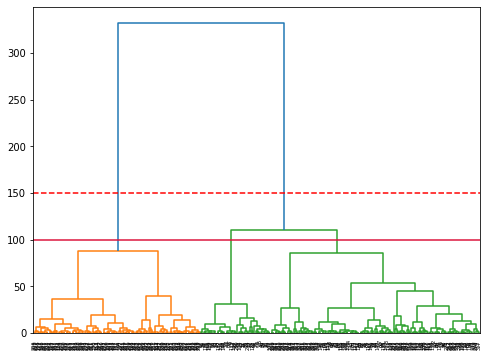

In [62]:
clusters = hierarchy.linkage(df, method = 'ward')

plt.figure(figsize = (8,6))
dendogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color = 'red', linestyle = '--')
plt.axhline(100, color = 'crimson')

Dendrogram is only a reference when used to choose the number of 

clusters. We already know that we have 3 types of penguins in the 

dataset, but if we were to determine their number by the Dendrogram, 2 

would be our first option, and 3 would be our second option.

Now, let's perform Agglomerative Clustering with Scikit-Learn to find cluster labels for the three types of penguins:

In [63]:
clustering_model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
clustering_model.fit(df)
labels = clustering_model.labels_
labels

array([2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,

And plot the data before and after Agglomerative Clustering with 3 clusters:

Text(0.5, 1.0, 'With Clustering')

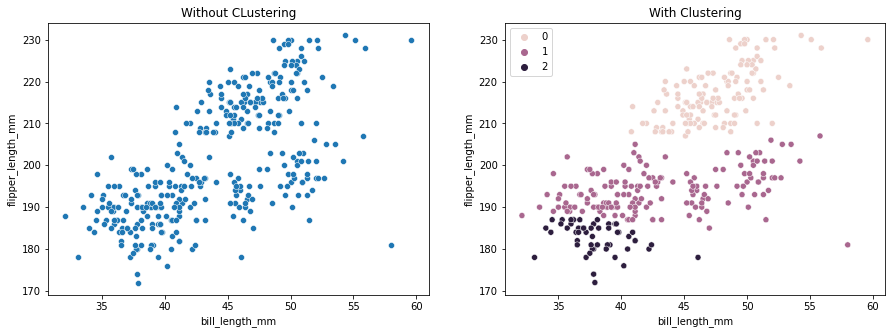

In [64]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
sns.scatterplot(ax = axes[0], data = df, x = 'bill_length_mm', y = 'flipper_length_mm').set_title('Without CLustering')
sns.scatterplot(ax = axes[1], data = df, x = 'bill_length_mm', y = 'flipper_length_mm',hue = labels).set_title('With Clustering') 

When using Agglomerative Clustering, you don't need to pre-determine

the number of clusters. As we have seen in the Dendrogram, if we don't 

determine how many clusters we aim to have, the algorithm will usually 

divide points into 2 clusters

*Let's try Agglomerative Clustering without specifying the number of clusters.*

**Let's Plot the data :**

a) without Agglomerative Clustering 

b) with 3 clusters

c) with no pre defined clusters:

In [65]:
clustering_model_no_clusters = AgglomerativeClustering(linkage= 'ward')
clustering_model_no_clusters.fit(df)
labels_no_clusters = clustering_model_no_clusters.labels_

***And finally, let's plot the data ***

a) without Agglomerative Clustering

b) with 3 clusters 

c) with no pre defined clusters:

Text(0.5, 1.0, 'Without choosing number of clusters')

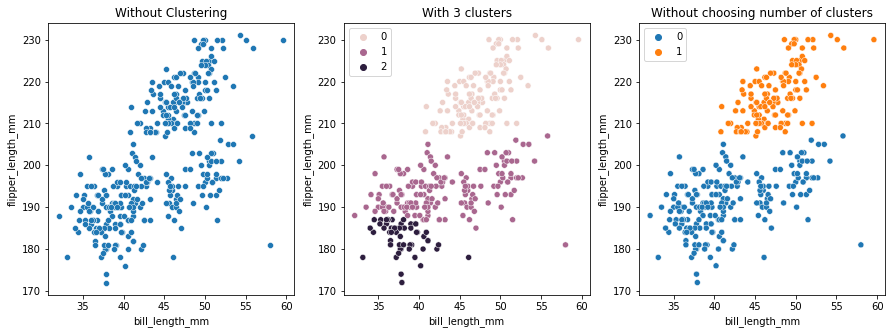

In [66]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
sns.scatterplot(ax = axes[0], data = df, x = 'bill_length_mm', y = 'flipper_length_mm').set_title('Without Clustering')
sns.scatterplot(ax = axes[1], data = df, x = 'bill_length_mm', y = 'flipper_length_mm', hue = labels).set_title('With 3 clusters')
sns.scatterplot(ax = axes[2], data = df, x = 'bill_length_mm', y = 'flipper_length_mm', hue = labels_no_clusters).set_title('Without choosing number of clusters')